# Model Training

### scikit - learn

https://scikit-learn.org/stable/

scikitlearn (sklearn) provides simple and efficient tools for predictive data analysis. It is built on NumPy, SciPy, and matplotlib. 

First thing, Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
# next load the data
df = pd.read_csv('final.csv')
df.head()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Condo
0,295850,2013,234,81,1,1,584,2013,0,0,0,1,0,1
1,216500,2006,169,51,1,1,612,1965,0,1,0,0,41,1
2,279900,2012,216,74,1,1,615,1963,0,0,0,1,49,1
3,379900,2005,265,92,1,1,618,2000,33541,0,0,0,5,1
4,340000,2002,88,30,1,1,634,1992,0,0,0,0,10,1


In [3]:
df.shape

(1863, 14)

## Linear Regression Model

In [4]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [5]:
# seperate input features in x
x= df.drop('price',axis=1)
# store the target variable in y
y = df['price']

**Train Test Split**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [6]:
# import module train test split
from sklearn.model_selection import train_test_split
# Split the dataset
xtrain, xtest, ytrain, ytest = train_test_split(x,y, stratify = df['property_type_Condo'], test_size = 0.2, random_state=123)

In [7]:
xtrain.shape, ytrain.shape

((1490, 13), (1490,))

In [8]:
# create an object of the class

# train your model

lrmodel = LinearRegression().fit(xtrain, ytrain)


lrmodel.coef_

array([ 7.94782249e+03, -1.23685277e+02,  1.73259162e+03,  3.09204982e+03,
        3.71800080e+03,  1.13587976e+01,  4.53048414e+03,  1.31250791e-01,
       -1.23172838e+04, -1.59643541e+03, -4.58904555e+04,  3.41733835e+03,
       -2.50853861e+04])

In [9]:
lrmodel.intercept_

-24796201.796427343

In [10]:
# make preditions on train set
ypred = lrmodel.predict(xtest)
ypred

array([ 280267.95860253,  397447.86641348,  349884.14074479,
        475198.2599156 ,  362711.97506833,  310613.69473866,
        471135.78587503,  485899.68975345,  497705.26757636,
        490684.09146702,  347402.57415499,  370956.59632768,
        485288.62553829,  518009.01893641,  804136.71697289,
        428019.34016943,  436724.31972826,  265536.15943165,
        348545.89833556,  396966.642235  ,  332087.64437996,
        389521.62747182,  326748.83581567,  427643.94911984,
        518050.89580003,  282825.70584153,  457326.51423363,
        379804.13798465,  387947.41265793,  438710.51187934,
        534312.46221875,  262861.0533223 ,  356122.37389655,
        298181.94110536,  503129.53655129,  476596.0056401 ,
        361135.80451762,  305816.01974449,  271016.87396887,
        408383.92493368,  643525.60045106,  425169.5673804 ,
        447501.63253359,  461210.20744269,  519291.07458204,
        499330.21975401,  387887.0213507 ,  440381.8625479 ,
        571320.00438722,

In [11]:
# evaluate your model
# we need mean absolute error
from sklearn.metrics import mean_absolute_error


In [12]:
# make predictions on test set

#evaluate the model
train_mae=mean_absolute_error(ytest, ypred)
print('Train error is', train_mae)


Train error is 89209.40588392866


## Is your model good? What did the business ask?

In [13]:
corr_matrix= df.corr()

In [14]:
corr_matrix = df.corr()

# drop features with correlation less than 0.4 with the target variable
target_corr = corr_matrix['price']
low_corr_features = target_corr[abs(target_corr) < 0.4].index
df_drop = df.drop(low_corr_features, axis=1)

df_drop.corr()

,price,property_tax,insurance,sqft
price,1.000000,0.558266,0.554583,0.486858
property_tax,0.558266,1.000000,0.983430,0.640393
insurance,0.554583,0.983430,1.000000,0.569497
sqft,0.486858,0.640393,0.569497,1.000000


<AxesSubplot:>

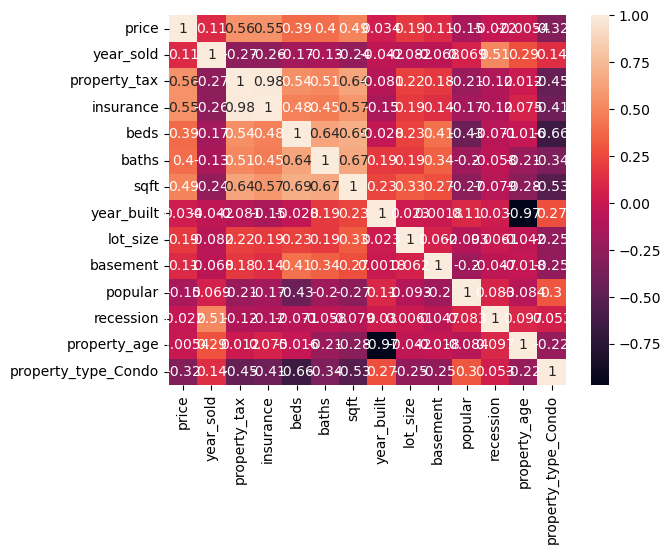

In [15]:
sns.heatmap(corr_matrix,annot=True)

In [16]:
x1= df_drop.drop('price',axis=1)
# store the target variable in y
y1 = df_drop['price']

In [17]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1,y1, test_size = 0.2, random_state=123)

In [18]:
lrmodel1 = LinearRegression().fit(xtrain1, ytrain1)

In [19]:
ypred1 = lrmodel1.predict(xtest1)

In [20]:
train_mae1=mean_absolute_error(ytest1, ypred1)
print('Train error is', train_mae1)

Train error is 93049.62058473517


### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
# create an instance of the model
dt = DecisionTreeRegressor(max_depth=4,max_features = 10)

In [84]:
# train the model
dtmodel = dt.fit(xtrain, ytrain)

In [85]:
# make predictions on the test set
ypred_dt = dtmodel.predict(xtest)

In [86]:
test_mae = mean_absolute_error(ytest, ypred_dt)

In [87]:
test_mae

61088.28536771204

In [88]:
ypred_dttrain =dtmodel.predict(xtrain)

In [89]:
test_mae_1 =  mean_absolute_error(ytrain, ypred_dttrain)

In [90]:
test_mae_1

57211.90913840678

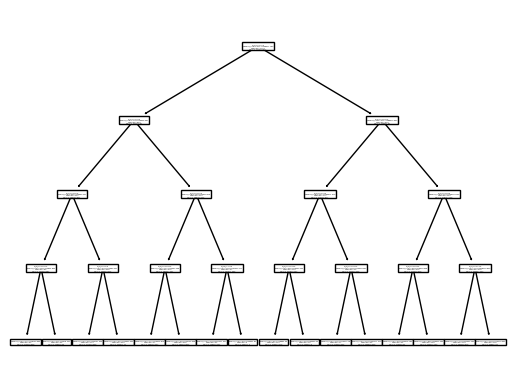

In [93]:
# plot the tree
from sklearn import tree


tree.plot_tree(dtmodel, feature_names=dtmodel.feature_names_in_)

tree.plot_tree(dtmodel)
plt.show()

In [94]:
plt.savefig('tree.png')

<Figure size 640x480 with 0 Axes>

### Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
#creat an instance of the model

rf = RandomForestRegressor(n_estimators=50,criterion='absolute_error')

In [75]:
# train the model
rfmodel = rf.fit(xtrain, ytrain)

In [76]:
# predictions
ypred = rfmodel.predict(xtest)


In [77]:
# evaluate 
test_mae = mean_absolute_error(ypred, ytest)
test_mae

46115.07461126005

### Pickle

In [79]:
import pickle

In [80]:
# save the model
pickle.dump(rfmodel, open('RF_Model','wb'))

In [81]:
# load model
Model = pickle.load(open('RF_Model','rb'))

In [82]:
Model.predict([[2013,234,81,1,1,584,2013,0,0,0,1,0,1]])

C:\Users\mishi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([304185.])